<a href="https://colab.research.google.com/github/Daniel-Francisco-Calderon-Lebro/Vision_por_Computador_con_IA/blob/main/Copia_de_DigitsCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.models import load_model
import random
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Load and preprocess dataset

(1797, 8, 8)
(1797,)
15.0 0.0
239.0625 0.0


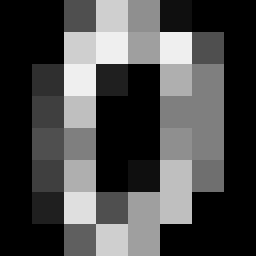

(1797, 8, 8, 1)
(1797, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Load the digits dataset
digits = load_digits()
X, y = digits.images, digits.target

print(X.shape)
print(y.shape)

image = cv2.resize(X[0], (256, 256), interpolation=cv2.INTER_AREA)
print(np.max(image),np.min(image))
image = (image/16.0)*255
print(np.max(image),np.min(image))
cv2_imshow(image)

# Preprocessing
# Normalizing pixel values
X = X / 16.0

# Reshaping the data to fit the model
# CNN in Keras requires an extra dimension at the end for channels,
# and the digits images are grayscale so it's just 1 channel
X = X.reshape(-1, 8, 8, 1)

# Convert labels to categorical (one-hot encoding)
y = to_categorical(y)

print(X.shape)
print(y.shape)
print(y[0])


# Split into train and test

In [ ]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model architecture

In [ ]:
# Building a simple CNN model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(8, 8, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes for digits 0-9

#Summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 6, 6, 64)            │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          28,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,000 (117.19 KB)

 Trainable params: 30,000 (117.19 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model

In [ ]:
# Training the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.2443 - loss: 2.2100 - val_accuracy: 0.7361 - val_loss: 1.7537
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7481 - loss: 1.5177 - val_accuracy: 0.8583 - val_loss: 0.8320
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8968 - loss: 0.6922 - val_accuracy: 0.9194 - val_loss: 0.4279
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9121 - loss: 0.3975 - val_accuracy: 0.9389 - val_loss: 0.2917
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9481 - loss: 0.2674 - val_accuracy: 0.9389 - val_loss: 0.2360
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9556 - loss: 0.2033 - val_accuracy: 0.9444 - val_loss: 0.1996
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9627 - loss: 0.1739 - val_accuracy: 0.9417 - val_loss: 0.1797
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9495 - loss: 0.1731 - val_accuracy: 0.9639 - val_lo

# Save model for future load and use

In [ ]:
#Define path to save
basepath = '/content/drive/MyDrive/Colab Notebooks/'

#Save model
model.save(basepath + 'digits_model.h5')

#Load saved model
loaded_model = load_model(basepath + 'digits_model.h5')

# Test on random sample

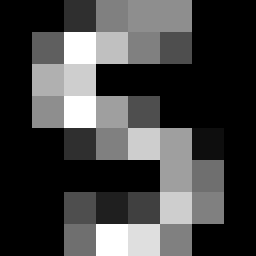

Ground truth class:  5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted class:  5


In [ ]:
#Choose random image from test subset
rand_pos = random.randint(0, len(X_test))
img_big = 255 * cv2.resize(X_test[rand_pos], (256, 256), interpolation=cv2.INTER_AREA)
cv2_imshow(img_big)

#Ground truth vs prediction
print('Ground truth class: ', np.argmax(y_test[rand_pos]))
print('Predicted class: ', np.argmax(loaded_model.predict(X_test[rand_pos].reshape(1, 8, 8, 1))))